In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras import layers, Sequential, optimizers, losses

In [4]:
x = tf.range(10)
x = tf.random.shuffle(x)
net = layers.Embedding(10, 50)
out = net(x)
print(x)
print(out)
print(net.embeddings)
print(net.embeddings.trainable)

tf.Tensor([1 8 4 5 9 3 2 6 7 0], shape=(10,), dtype=int32)
tf.Tensor(
[[-0.04104223  0.03661125 -0.02370019 -0.03036099  0.00773614  0.01967012
   0.01004293 -0.04373357 -0.0409      0.02145486 -0.04148582 -0.01358209
  -0.0466767   0.02156265  0.04181829  0.01141511  0.0442355   0.01730238
   0.03390783  0.03080847 -0.02698643  0.00875882  0.010825   -0.01409436
  -0.01836531 -0.0246737   0.02806444 -0.03427326 -0.0112129   0.00909882
   0.01091373  0.01016245 -0.00542359 -0.00608736  0.02559236  0.01436975
  -0.03503488  0.01988143 -0.01447881  0.01518646  0.00454659 -0.04424958
  -0.03936644 -0.04577525 -0.02779775  0.03399304  0.04801447 -0.03898401
   0.01959674  0.00158527]
 [ 0.04222841  0.0127858   0.02201172 -0.0036354   0.00950322 -0.00115615
  -0.00958993  0.04028288  0.03263043 -0.04670949 -0.02430674  0.04813853
  -0.01745922  0.02305155 -0.03053217 -0.04161077  0.01449535  0.04767524
  -0.00613078 -0.01173099  0.03007326  0.03098941 -0.01321596  0.040491
  -0.03967836  0.

In [5]:
filename = 'glove.6B.50d.txt'
def loadGloVe(filename):
    vocab = []
    embd = []
    emb_size = 50
    vocab.append('unk') #装载不认识的词
    embd.append([0]*emb_size) #这个emb_size可能需要指定
    file = open(filename,'r')
    for line in file.readlines():
        row = line.strip().split(' ')
        vocab.append(row[0])
        embd.append(row[1:])
    print('Loaded GloVe!')
    file.close()
    return vocab,embd
vocab,embd = loadGloVe(filename)
vocab_size = len(vocab)
embedding_dim = len(embd[0])
embedding = np.asarray(embd)

Loaded GloVe!


In [6]:
import numpy as np
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import one_hot
#定义文档
docs = [
    'Well done',
    'good work',
    'Great effort',
    'nice work',
    'Excellent',
    'Weak',
    'not good',
    'poor work',
    'could have done better'
]
labels = np.array([1,1,1,1,1,0,0,0,0])
vocab_size = 50
encoded_docs = [one_hot(d,vocab_size) for d in docs]
print(encoded_docs)
max_len = max([len(v.split())for v in docs])
padded_docs = pad_sequences(encoded_docs,maxlen=max_len,padding='post')
print(padded_docs)

#定义模型
from tensorflow.keras import layers
model = Sequential()
model.add(layers.Embedding(vocab_size,8,input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
#编译模型
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)
model.summary()

[[4, 16], [5, 36], [42, 37], [20, 36], [9], [36], [9, 5], [20, 36], [32, 36, 16, 42]]
[[ 4 16  0  0]
 [ 5 36  0  0]
 [42 37  0  0]
 [20 36  0  0]
 [ 9  0  0  0]
 [36  0  0  0]
 [ 9  5  0  0]
 [20 36  0  0]
 [32 36 16 42]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(padded_docs,labels)
print('Accuracy:%f'%(accuracy*100))

1/1 [==============================] - 0s 22ms/step - loss: 0.6979 - acc: 0.3333
Accuracy:33.333334


Epoch 1/150
1/1 [==============================] - 1s 710ms/step - loss: 0.6979 - acc: 0.3333
Epoch 2/150
1/1 [==============================] - 0s 2ms/step - loss: 0.6963 - acc: 0.3333
Epoch 3/150
1/1 [==============================] - 0s 2ms/step - loss: 0.6947 - acc: 0.3333
Epoch 4/150
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.3333
Epoch 5/150
1/1 [==============================] - 0s 3ms/step - loss: 0.6915 - acc: 0.4444
Epoch 6/150
1/1 [==============================] - 0s 3ms/step - loss: 0.6899 - acc: 0.4444
Epoch 7/150
1/1 [==============================] - 0s 3ms/step - loss: 0.6883 - acc: 0.5556
Epoch 8/150
1/1 [==============================] - 0s 2ms/step - loss: 0.6868 - acc: 0.6667
Epoch 9/150
1/1 [==============================] - 0s 2ms/step - loss: 0.6852 - acc: 0.7778
Epoch 10/150
1/1 [==============================] - 0s 3ms/step - loss: 0.6837 - acc: 0.8889
Epoch 11/150
1/1 [==============================] - 0s 2ms/step - loss: 0.682

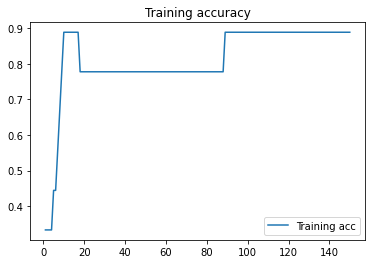

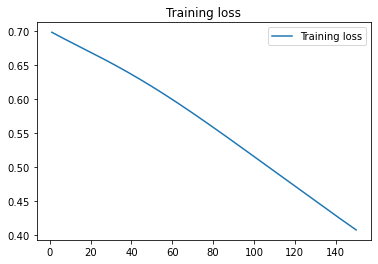

In [13]:
import matplotlib.pyplot as plt

history = model.fit(
    padded_docs,
    labels,
    epochs=150
)


acc = history.history['acc']
loss = history.history['loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,label = 'Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,label = 'Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [20]:
cell = layers.SimpleRNNCell(3)
cell.build(input_shape=(None,4))
cell.trainable_variables

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.04824024, -0.866671  , -0.01306361],
        [-0.69604814, -0.53313726, -0.8953723 ],
        [-0.12791592,  0.8019912 , -0.6612742 ],
        [-0.10096687,  0.74701846,  0.18305457]], dtype=float32)>,
 <tf.Variable 'recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.04335666,  0.74322754,  0.66763234],
        [-0.64718276, -0.5299866 ,  0.54796773],
        [ 0.76110095, -0.4083221 ,  0.50398254]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [25]:
h0 = [tf.zeros([4,64])]
x = tf.random.normal([4,80,100])
xt = x[:,0,:]
cell = layers.SimpleRNNCell(64)
out, h1 = cell(xt, h0)
print(out.shape, h1[0].shape)
print(id(out),id(h1[0]))

(4, 64) (4, 64)
140456481582240 140456481582240


<tf.Tensor: shape=(4, 64), dtype=float32, numpy=
array([[-0.622794  , -0.7578877 ,  0.7247572 , -0.51580095,  0.6263628 ,
        -0.19127905, -0.62595516,  0.69797915, -0.01084008, -0.7604019 ,
        -0.36244857,  0.9124519 ,  0.83474785, -0.41350278,  0.783318  ,
        -0.19957668,  0.40632552,  0.8233092 ,  0.99818134, -0.978804  ,
        -0.9040894 , -0.94575936,  0.77196866,  0.8785654 , -0.8286943 ,
        -0.63247144, -0.9687763 , -0.8112018 ,  0.95671636, -0.448426  ,
         0.9248826 ,  0.510795  , -0.5113191 ,  0.47816586,  0.90293217,
         0.05577772, -0.68908703,  0.57003653,  0.9989039 ,  0.17570761,
         0.37626356, -0.5326265 , -0.04508969, -0.9354595 ,  0.87394375,
        -0.23534876, -0.68192005,  0.14333229,  0.9232905 ,  0.888446  ,
         0.5402215 ,  0.05540015, -0.43938404, -0.24877436,  0.85240513,
        -0.9675758 , -0.00203971,  0.9385038 ,  0.99153566,  0.9138791 ,
         0.9936421 , -0.81869364, -0.8762752 ,  0.9332481 ],
       [-0.344

In [4]:
x = tf.random.normal([4,80,100])
xt = x[:,0,:]

TensorShape([4, 80, 100])

In [6]:
cell0 = layers.SimpleRNNCell(64)
cell1 = layers.SimpleRNNCell(64)
h0 = [tf.zeros([4,64])]
h1 = [tf.zeros([4,64])]

In [7]:
for xt in tf.unstack(x, axis=1):
    out0, h0 = cell0(xt, h0)
    out1, h0 = cell1(out0, h1)

In [8]:
middle_sequences = []
for xt in tf.unstack(x, axis = 1):
    out0, h0 = cell0(xt, h0)
    middle_sequences.append(out0)
for xt in middle_sequences:
    out1, h1 = cell1(xt, h1)

In [9]:
layer = layers.SimpleRNN(64)
x = tf.random.normal([4,80,100])
out = layer(x)
out.shape

TensorShape([4, 64])

In [10]:
layer = layers.SimpleRNN(64, return_sequences=True)
x = tf.random.normal([4,80,100])
out = layer(x)
out.shape

TensorShape([4, 80, 64])

In [11]:
net = k.Sequential([
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(64),
])
out = net(x)

In [12]:
out.shape

TensorShape([4, 64])

In [13]:
batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100
(x_train, y_train), (x_test, y_test) = k.datasets.imdb.load_data(num_words=total_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/zhangyunfei_06/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/zhangyunfei_06/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

In [17]:
print(x_train.shape, len(x_train[0]), y_train.shape)
print(x_test.shape, len(x_test[0]), y_test.shape)

(25000,) 218 (25000,)
(25000,) 68 (25000,)


In [25]:
word_index = k.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [29]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,"?") for i in text])

In [30]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [31]:
x_train = k.preprocessing.sequence.pad_sequences(x_train,maxlen=max_review_len)
x_test = k.preprocessing.sequence.pad_sequences(x_test,maxlen=max_review_len)

In [63]:
db_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
db_train = db_train.shuffle(1000).batch(batch_size,drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db_test = db_test.batch(batch_size,drop_remainder=True)
print("x_train_shape:",x_train.shape, tf.reduce_max(y_train),tf.reduce_min(y_train))
print("x_test_shape:",x_test.shape)

x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)


In [67]:
class MyRNN(k.Model):
    def __init__(self, units):
        super(MyRNN, self).__init__()
        self.state0 = [tf.zeros([batch_size,units])]
        self.state1 = [tf.zeros([batch_size,units])]
        self.embedding = layers.Embedding(total_words,embedding_len,input_length=max_review_len)
        # 构建2个Cell
        self.rnn_cell0 = layers.SimpleRNNCell(units, dropout=0.5)
        self.rnn_cell1 = layers.SimpleRNNCell(units, dropout=0.5)
        # 构建分类网络，用于将CELL的输出特征进行分类，2分类
        # [b, 80, 100] => [b, 64] => [b, 1]
        self.outlayer = Sequential([
        	layers.Dense(units),
        	layers.Dropout(rate=0.5),
        	layers.ReLU(),
        	layers.Dense(1)])
        
    def call(self, inputs, training = None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.rnn_cell0(word, state0, training)
            out1, state1 = self.rnn_cell1(out0, state1, training)
        x = self.outlayer(out1, training)
        prob = tf.sigmoid(x)
        
        return prob
    
def main():
    units = 64
    epochs = 20
    model = MyRNN(units)
    model.compile(optimizer=optimizers.Adam(0.001),loss=losses.BinaryCrossentropy(),metrics=['accuracy'])
    model.fit(db_train, epochs = epochs, validation_data=db_test)
    model.evaluate(db_test)
if __name__ == "__main__":
    main()

Epoch 1/20
195/195 [==============================] - 11s 36ms/step - loss: 0.7054 - accuracy: 0.5099 - val_loss: 0.6816 - val_accuracy: 0.5960
Epoch 2/20
195/195 [==============================] - 6s 29ms/step - loss: 0.5783 - accuracy: 0.6942 - val_loss: 0.4138 - val_accuracy: 0.8169
Epoch 3/20
195/195 [==============================] - 6s 30ms/step - loss: 0.3910 - accuracy: 0.8355 - val_loss: 0.3870 - val_accuracy: 0.8289
Epoch 4/20
195/195 [==============================] - 6s 31ms/step - loss: 0.3113 - accuracy: 0.8771 - val_loss: 0.4980 - val_accuracy: 0.8107
Epoch 5/20
195/195 [==============================] - 6s 33ms/step - loss: 0.2480 - accuracy: 0.9043 - val_loss: 0.4952 - val_accuracy: 0.8195
Epoch 6/20
195/195 [==============================] - 6s 33ms/step - loss: 0.1838 - accuracy: 0.9313 - val_loss: 0.6103 - val_accuracy: 0.8069
Epoch 7/20
195/195 [==============================] - 6s 31ms/step - loss: 0.1476 - accuracy: 0.9463 - val_loss: 0.6188 - val_accuracy: 0.805

In [2]:
W = tf.ones([2,2])
eigenvalues = tf.linalg.eigh(W)[0]

In [10]:
val = [W]
for i in range(10):
    val.append(val[-1]@W)

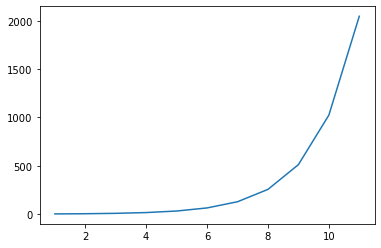

In [18]:
norm = list(map(lambda x:tf.norm(x).numpy(),val))
plt.plot(range(1,12),norm)

In [24]:
a = tf.random.uniform([2,2])
tf.clip_by_value(a,0.4,0.6)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.46585858, 0.6       ],
       [0.6       , 0.4       ]], dtype=float32)>

In [25]:
a = tf.random.uniform([2,2]) * 5
b = tf.clip_by_norm(a,5)
tf.norm(a),tf.norm(b)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.1137547>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

In [27]:
w1 = tf.random.normal([3,3])
w2 = tf.random.normal([3,3])
global_norm = tf.math.sqrt(tf.norm(w1)**2 + tf.norm(w2)**2)
(ww1,ww2), global_norm = tf.clip_by_global_norm([w1,w2],2)
global_norm2 = tf.math.sqrt(tf.norm(ww1)**2 + tf.norm(ww2)**2)
print(global_norm,global_norm2)

tf.Tensor(4.377584, shape=(), dtype=float32) tf.Tensor(2.0, shape=(), dtype=float32)
